In [1]:
import os, sys
my_path = '/content/notebooks'
os.symlink('/content/drive/MyDrive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target
feature_names = dataset.feature_names.tolist()
target_names = dataset.target_names.tolist()


In [3]:
from sklearn.model_selection import train_test_split
trn_x, tst_x, trn_y, tst_y = train_test_split(x, y, test_size=0.4, random_state=1234)
print(trn_x.shape, tst_x.shape)

(341, 30) (228, 30)


In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(trn_x, trn_y)
pred = clf.predict(tst_x)

In [6]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression().fit(trn_x, trn_y)
pred_lr = clf_lr.predict(tst_x)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_true=tst_y, y_pred=pred))
print(classification_report(y_true=tst_y, y_pred=pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        84
           1       0.91      0.90      0.91       144

    accuracy                           0.88       228
   macro avg       0.87      0.87      0.87       228
weighted avg       0.88      0.88      0.88       228

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        84
           1       0.93      0.96      0.95       144

    accuracy                           0.93       228
   macro avg       0.93      0.92      0.92       228
weighted avg       0.93      0.93      0.93       228



In [27]:
!pip install --target=$my_path graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [9]:
import graphviz
from sklearn.tree import export_graphviz

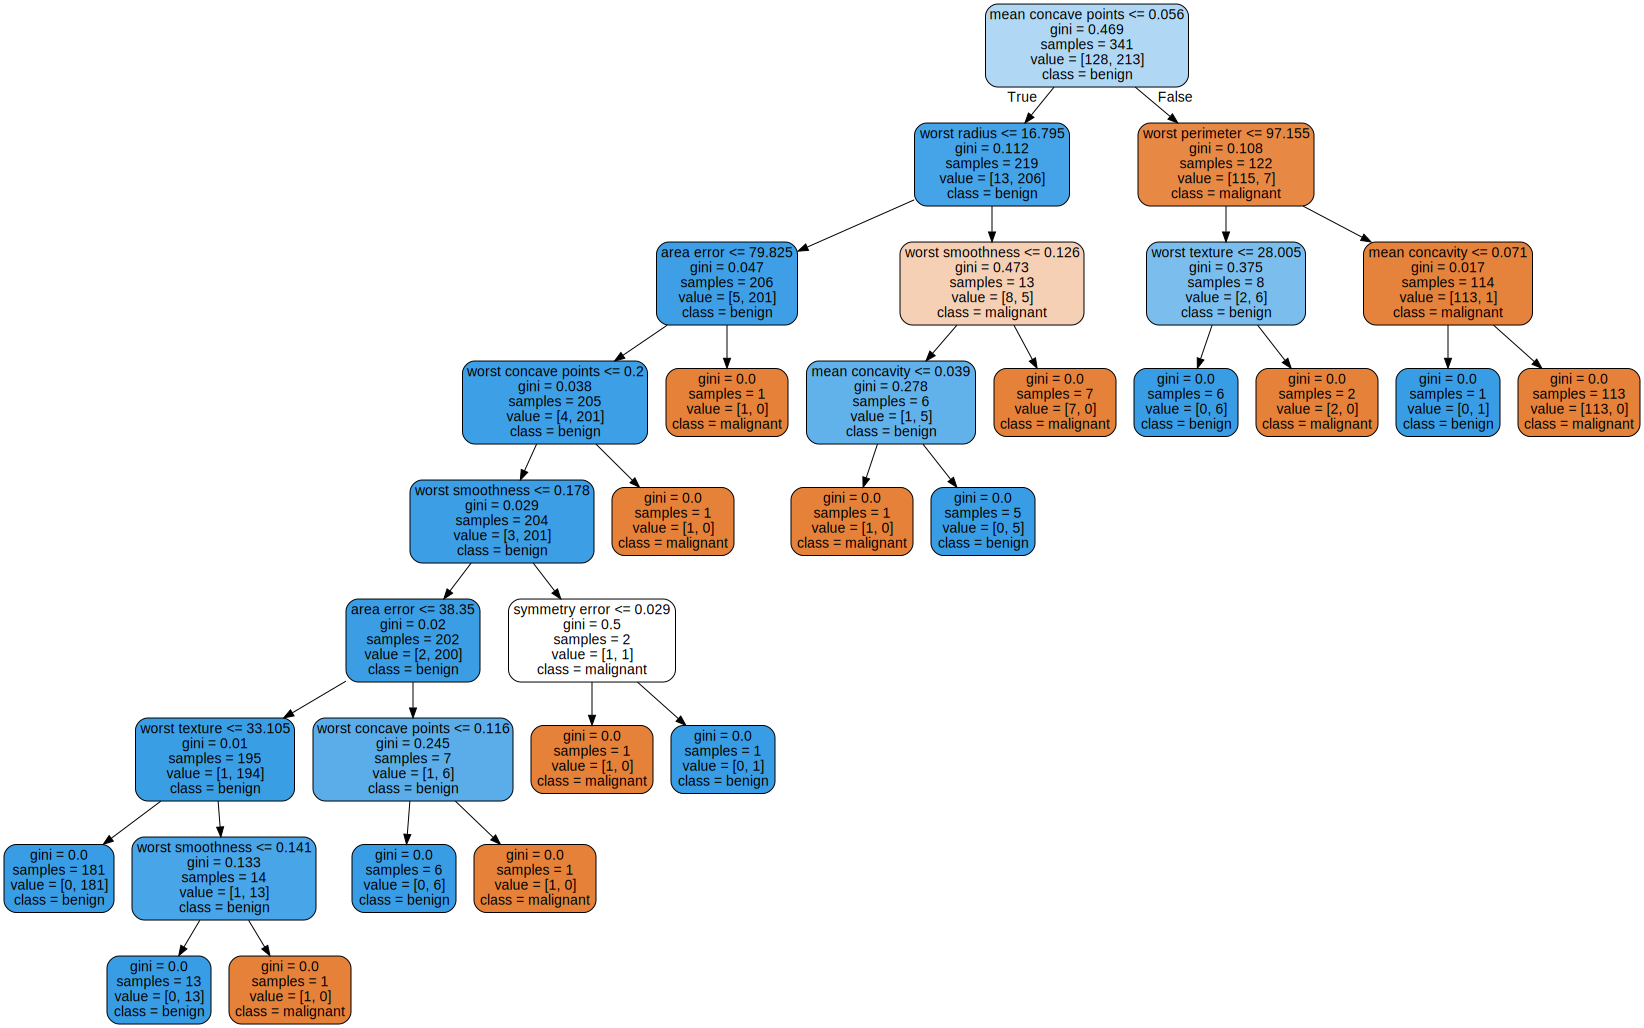

In [10]:
viz_tree = export_graphviz(clf, feature_names=feature_names,
                           class_names=target_names,
                           rounded=True,
                           filled=True,
                           out_file=None)
graph = graphviz.Source(viz_tree)
graph

In [11]:
clf_prun = DecisionTreeClassifier(max_depth=2).fit(trn_x, trn_y)
pred_prun = clf_prun.predict(tst_x)
print(classification_report(y_true=tst_y, y_pred=pred_prun))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        84
           1       0.95      0.91      0.93       144

    accuracy                           0.91       228
   macro avg       0.90      0.91      0.91       228
weighted avg       0.91      0.91      0.91       228



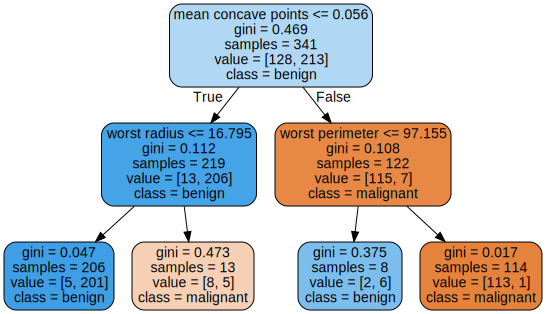

In [12]:
viz_prun_tree = export_graphviz(clf_prun, feature_names=feature_names, out_file=None,
                                class_names=target_names, rounded=True, filled=True)
graph_prun = graphviz.Source(viz_prun_tree)
graph_prun

In [13]:
from sklearn.metrics import accuracy_score, f1_score
acc=[]
f1=[]

Max_Depth = [2,4,6,8,10]
for depth in Max_depth:
  clf=DecisionTreeClassifier(max_dpeth=depth).fit(trn_x, trn_y)
  pred = clf.predict(tst_x)

acc.append(accuracy_score(y_true=tst_y, y_pred=pred))
f1.append(f1_score(y_true=tst_y, y_pred=pred))

SyntaxError: ignored

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [15]:
ex_x, ex_y = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=4, random_state=1234)

NameError: ignored

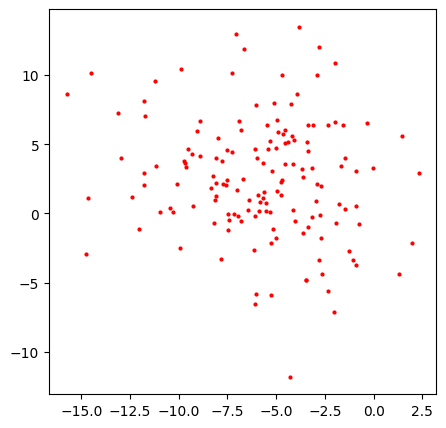

In [26]:
plt.figure(figsize=(5,5))
plt.plot(ex_x[:, 0][ex_y==0],ex_x[:, 1][ex_y==0], "ro", markersize=2)
plt.plot(ex_X[:, 0][ex_y==1], ex_x[:, 1][ex_y==1], "go", markersize=2)
plt.xlabel("x1", fontsize=10)
plt.ylabel("x2", fontsize=10, rotation=0)
plt.show()

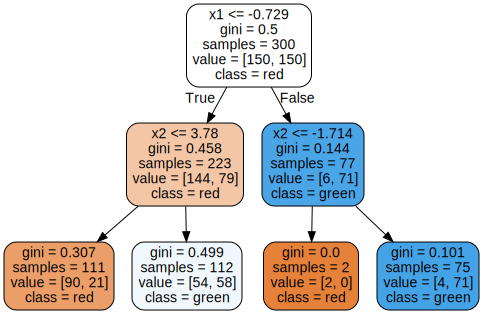

In [17]:
clf_2d = DecisionTreeClassifier(max_depth=2).fit(ex_x,ex_y)
viz_tree_2d = export_graphviz(clf_2d, feature_names=['x1','x2'], out_file=None,
                              class_names=['red', 'green'], rounded=True, filled=True)
graphviz.Source(viz_tree_2d)

In [21]:
!pip install --target=$my_path git+https://github.com/lee-ju/dslearn.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/lee-ju/dslearn.git to /tmp/pip-req-build-z774w4oh
  Running command git clone --filter=blob:none --quiet https://github.com/lee-ju/dslearn.git /tmp/pip-req-build-z774w4oh
  Resolved https://github.com/lee-ju/dslearn.git to commit c6bbc0b0bfcd08b5002a2b9cedaf4c9d330e3f94
  Preparing metadata (setup.py) ... done
  Created wheel for dslearn: filename=dslearn-0.0.1-py3-none-any.whl size=3771 sha256=e1beaa36c78b95be783ed735e41a21691dcaaf36f6803c3919c80e9fbdd2e038
  Stored in directory: /tmp/pip-ephem-wheel-cache-5h5a1olp/wheels/35/2c/0e/87d50df955494dcdbd6c07b6a1450aacd91b981126f31c76ce
Successfully built dslearn


In [2]:
from dslearn import multi_stat

ModuleNotFoundError: ignored

In [ ]:
multi_stat.viz_boundary(clf_2d, ex_x, ex_y)

NameError: ignored

In [ ]:
clf_2d_lr = LogisticRegression().fit(ex_x, ex_y)
multi_stat.viz_boundary(clf_2d_lr, ex_x, ex_y)

NameError: ignored

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3).fit(trn_x, trn_y)
predicted_value = model.predict(tst_x)
print(classification_report(y_true=tst_y, y_pred=predicted_value))

NameError: ignored